In [11]:
import scipy.integrate
import csv
import os

## Standard Normal Distribution
$p(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^{2}}{2}}$

In [12]:

## Make a graph of the standard normal distribution

x = []
y = []
i = -4
while i<4:
    i += 0.01
    x.append(round(i, 3))
    
## Euler's Number
e = 2.718281828459

## pi
pi = 3.14159265

## constant
c = 1/((2*pi)**0.5)

for a in x:
    # exponent
    expo = (-a**2)/2
    # distribution
    distrb = c*(e**expo)
    y.append(distrb)

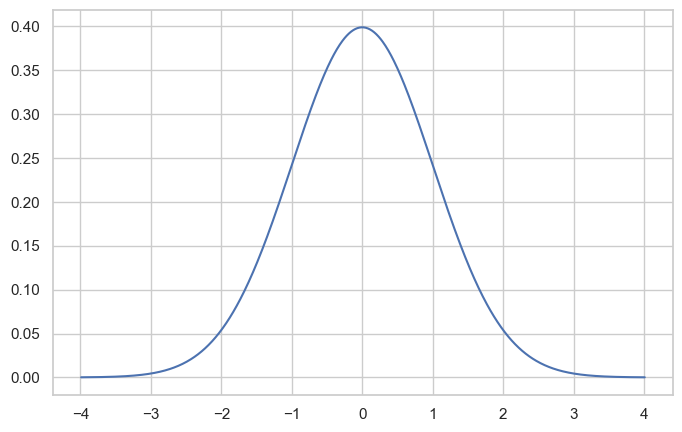

In [13]:
## Plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize = (8, 5))
plt.plot(x, y)
plt.show()

In [14]:
# lower limit
negative_infinity = -float('inf')

# Upper limit
z = 0

## Function of x
def f(x):
    #constant
    c = 1/((2*pi)**0.5)
    exponent = (-x**2)/2
    standard_normal_curve = c*(e**exponent)
    return standard_normal_curve

probability, error = scipy.integrate.quad(f, negative_infinity, z)
print('Probability: ', round(probability, 5))

Probability:  0.5


In [15]:
z_table = []

## x = [-4, 4]
for row in x:
    probability, error = scipy.integrate.quad(f, negative_infinity, row)
    z_table.append([row, round(probability, 5)])
    print(row, round(probability, 5))


-3.99 3e-05
-3.98 3e-05
-3.97 4e-05
-3.96 4e-05
-3.95 4e-05
-3.94 4e-05
-3.93 4e-05
-3.92 4e-05
-3.91 5e-05
-3.9 5e-05
-3.89 5e-05
-3.88 5e-05
-3.87 5e-05
-3.86 6e-05
-3.85 6e-05
-3.84 6e-05
-3.83 6e-05
-3.82 7e-05
-3.81 7e-05
-3.8 7e-05
-3.79 8e-05
-3.78 8e-05
-3.77 8e-05
-3.76 8e-05
-3.75 9e-05
-3.74 9e-05
-3.73 0.0001
-3.72 0.0001
-3.71 0.0001
-3.7 0.00011
-3.69 0.00011
-3.68 0.00012
-3.67 0.00012
-3.66 0.00013
-3.65 0.00013
-3.64 0.00014
-3.63 0.00014
-3.62 0.00015
-3.61 0.00015
-3.6 0.00016
-3.59 0.00017
-3.58 0.00017
-3.57 0.00018
-3.56 0.00019
-3.55 0.00019
-3.54 0.0002
-3.53 0.00021
-3.52 0.00022
-3.51 0.00022
-3.5 0.00023
-3.49 0.00024
-3.48 0.00025
-3.47 0.00026
-3.46 0.00027
-3.45 0.00028
-3.44 0.00029
-3.43 0.0003
-3.42 0.00031
-3.41 0.00032
-3.4 0.00034
-3.39 0.00035
-3.38 0.00036
-3.37 0.00038
-3.36 0.00039
-3.35 0.0004
-3.34 0.00042
-3.33 0.00043
-3.32 0.00045
-3.31 0.00047
-3.3 0.00048
-3.29 0.0005
-3.28 0.00052
-3.27 0.00054
-3.26 0.00056
-3.25 0.00058
-3.24 0.0006
-3.

In [16]:
## Saving into csv file
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
csv_file_path = os.path.join(folder_path, "z_table.csv")

with open(csv_file_path, 'w', newline='')as zTableFile:
    z_table_writer = csv.writer(zTableFile, delimiter=',')
    for row in z_table:
        z_table_writer.writerow(row)

In [17]:
import csv

incomeData = []
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
csv_file_path = os.path.join(folder_path, "usa.csv")
with open(csv_file_path, newline = '') as myFile:
    data = csv.reader(myFile)
    for row in data:
        #skip the header
        if row[6] != 'INCTOT':
            #Skip anyone who did not earn or had a negative income
            if int(row[6]) > 1:
                # skip NA
                if int(row[6]) != 9999999:
                    #Akip anyone under the age of 18
                    if int(row[1]) > 17:
                        incomeData.append(int(row[6]))


In [18]:
##Function for Mean
def getMean(sampleList):
    sampleSize = len(sampleList)
    totalSumIncome = 0
    for row in sampleList:
        totalSumIncome = row + totalSumIncome
    mean = totalSumIncome / sampleSize
    return mean

## Function target population Standard Deviation
def getPopSD(sampleList, mean):
    sumOfSquares = 0
    sampleSize = len(sampleList)
    for row in sampleList:
        deviationScore = row - mean
        sumOfSquares = deviationScore**2 + sumOfSquares
    
    # Rather than sampleSize-1 like in sample SD
    variance = sumOfSquares/sampleSize
    SD = variance**0.5
    return SD

In [19]:
mean = getMean(incomeData)
print(mean)
popSD = getPopSD(incomeData, mean)
print(popSD)

## Select some income
z = 50000

## Calculate the z score for that income
z_score = (z-mean)/popSD
z_score = round(z_score, 2)
print('This is the z-score: ', z_score)

47496.591260247595
63744.10862782605
This is the z-score:  0.04


In [20]:
# load in our z table from earlier
z_table = []
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
csv_file_path = os.path.join(folder_path, "z_table.csv")
with open(csv_file_path, newline='') as zTableFile:
    data = csv.reader(zTableFile)
    for row in data:
        z_table.append(row)
# print(z_table)

## Find the percentile rank of our z score in the z table
for row in z_table:
#     print(row[1])
    if float(row[0]) == z_score:
        probability = row[1]
        percentile = round(float(probability)*100, 2)
        print('An income of', z, 'has a standard score of', z_score,
             'which corresponds to a percentile of', percentile)
        break



An income of 50000 has a standard score of 0.04 which corresponds to a percentile of 51.59
